![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Quick Flux Processing Chain
</b>
</span>

---
**Notebook version**: `2` (26 Nov 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

# Description

- quick (simplified) version of the flux processing chain
- uses a lot of default values, which means not a lot of user input is needed
- recommended to quickly check on current data
- produces data up to Level-3.3 (USTAR filtering for NEE)
- for more info about flux levels see [Flux Processing Chain](https://www.swissfluxnet.ethz.ch/index.php/data/ecosystem-fluxes/flux-processing-chain/)

# Settings

In [1]:
FLUXVARS = ['FC', 'LE', 'H']  # Name of the flux variable in fluxnet output files: FC, FH2O, LE, ET, H, FN2O, FCH4; must be given as list even if there is only one variable
SOURCEDIRS = [r"..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple"]  # Folders where the EddyPro output files are located
SITE_LAT = 47.41887   # Latitude of site
SITE_LON = 8.491318  # Longitude of site
FILETYPE = 'EDDYPRO-FLUXNET-CSV-30MIN'  # Filetype of EddyPro output files, can be 'EDDYPRO-FLUXNET-CSV-30MIN' or 'EDDYPRO-FULL-OUTPUT-CSV-30MIN'
UTC_OFFSET = 1  # Time stamp offset in relation to UTC, e.g. 1 for UTC+01:00 (CET), important for the calculation of potential radiation for detecting daytime and nighttime
NIGHTTIME_THRESHOLD = 20  # Threshold for potential radiation in W m-2, conditions below threshold are nighttime
DAYTIME_ACCEPT_QCF_BELOW = 2
NIGHTTIMETIME_ACCEPT_QCF_BELOW = 2

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from diive.pkgs.fluxprocessingchain.fluxprocessingchain import QuickFluxProcessingChain
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.86.0


# Run

Found 3 files with extension *.csv and file IDs ['eddypro_', '_fluxnet_']:
 Found file #1: ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240818-090003_fluxnet_2024-08-18T090018_adv.csv
 Found file #2: ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240819-090003_fluxnet_2024-08-19T090019_adv.csv
 Found file #3: ..\..\diive\configs\exampledata\EDDYPRO-FLUXNET-CSV-30MIN_multiple\eddypro_CH-HON_FR-20240820-090004_fluxnet_2024-08-20T090021_adv.csv
Reading file eddypro_CH-HON_FR-20240818-090003_fluxnet_2024-08-18T090018_adv.csv ...
Reading file eddypro_CH-HON_FR-20240819-090003_fluxnet_2024-08-19T090019_adv.csv ...
Reading file eddypro_CH-HON_FR-20240820-090004_fluxnet_2024-08-20T090021_adv.csv ...
Detected base variable CO2 for FC. (CO2 was used to calculate FC.)
Calculated potential radiation from latitude and longitude (SW_IN_POT) ... 
Calculated daytime flag DAYTIME and nighttime flag NIGHTTIME from SW_IN_PO

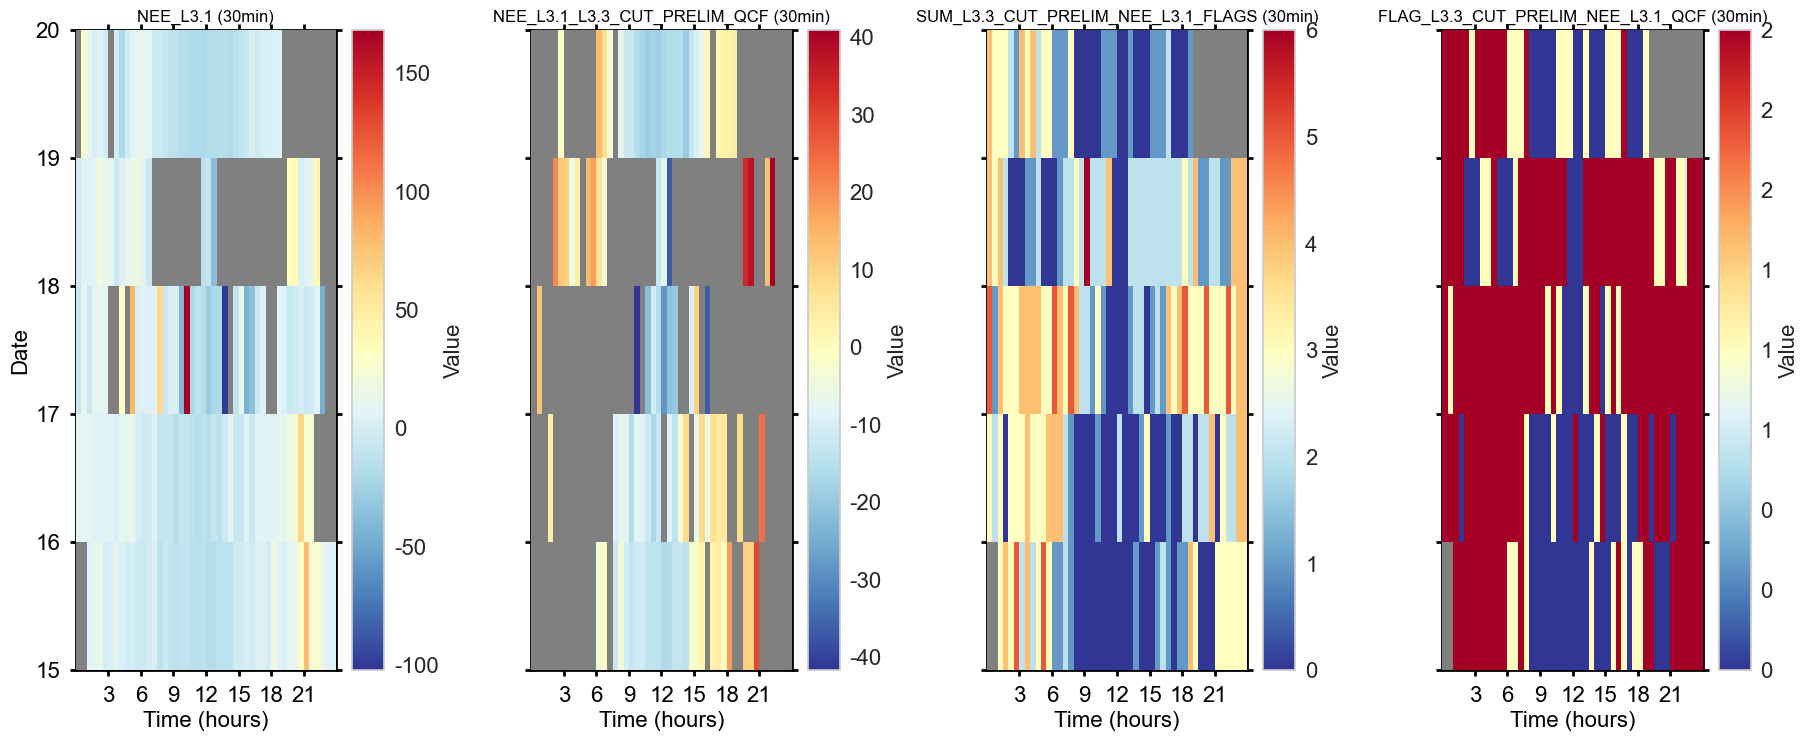

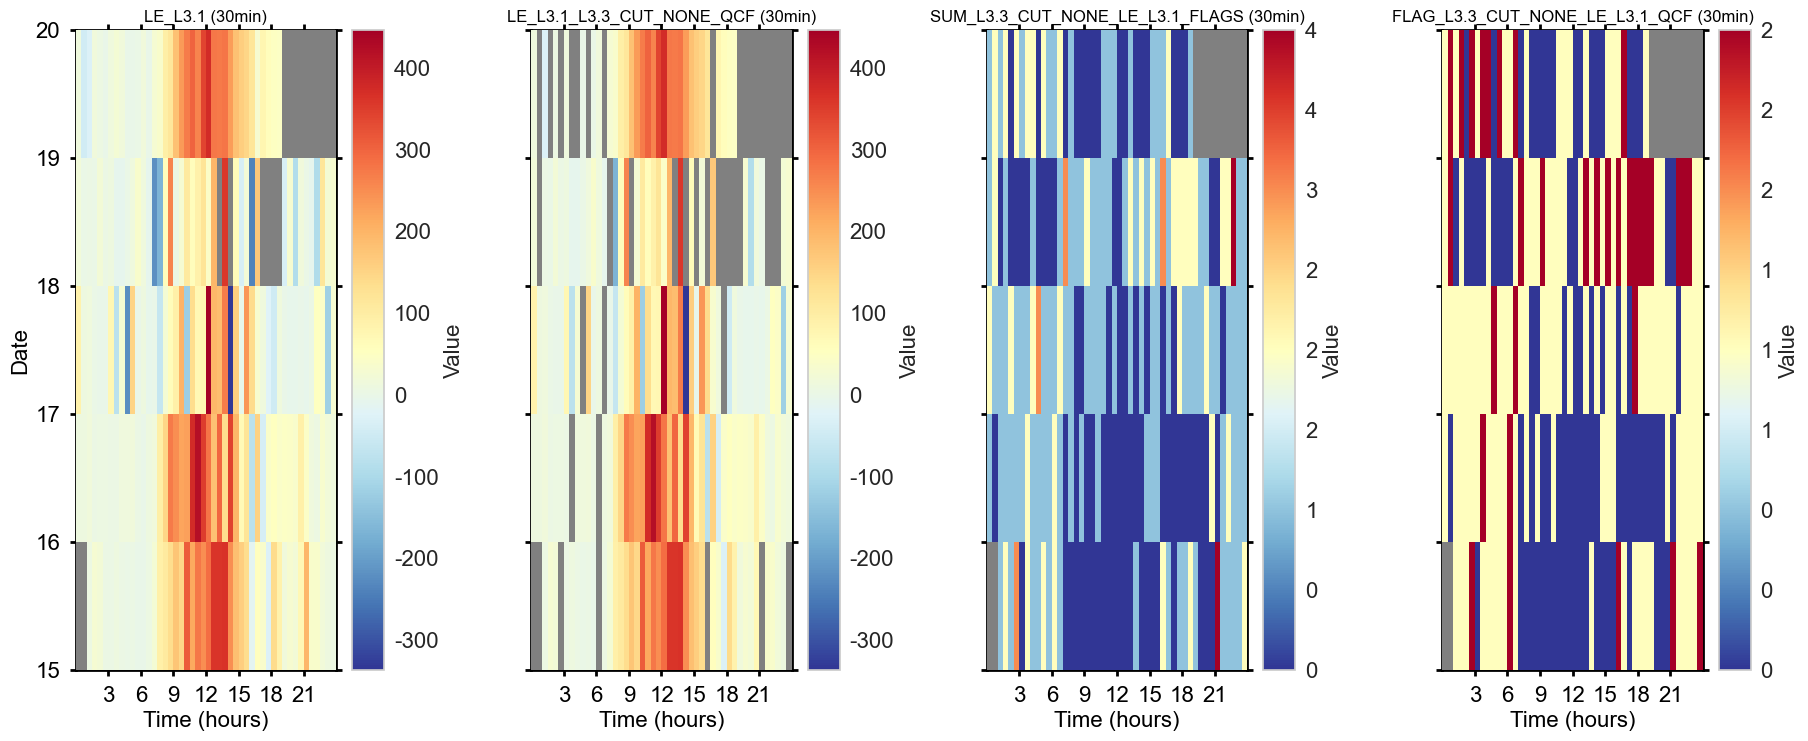

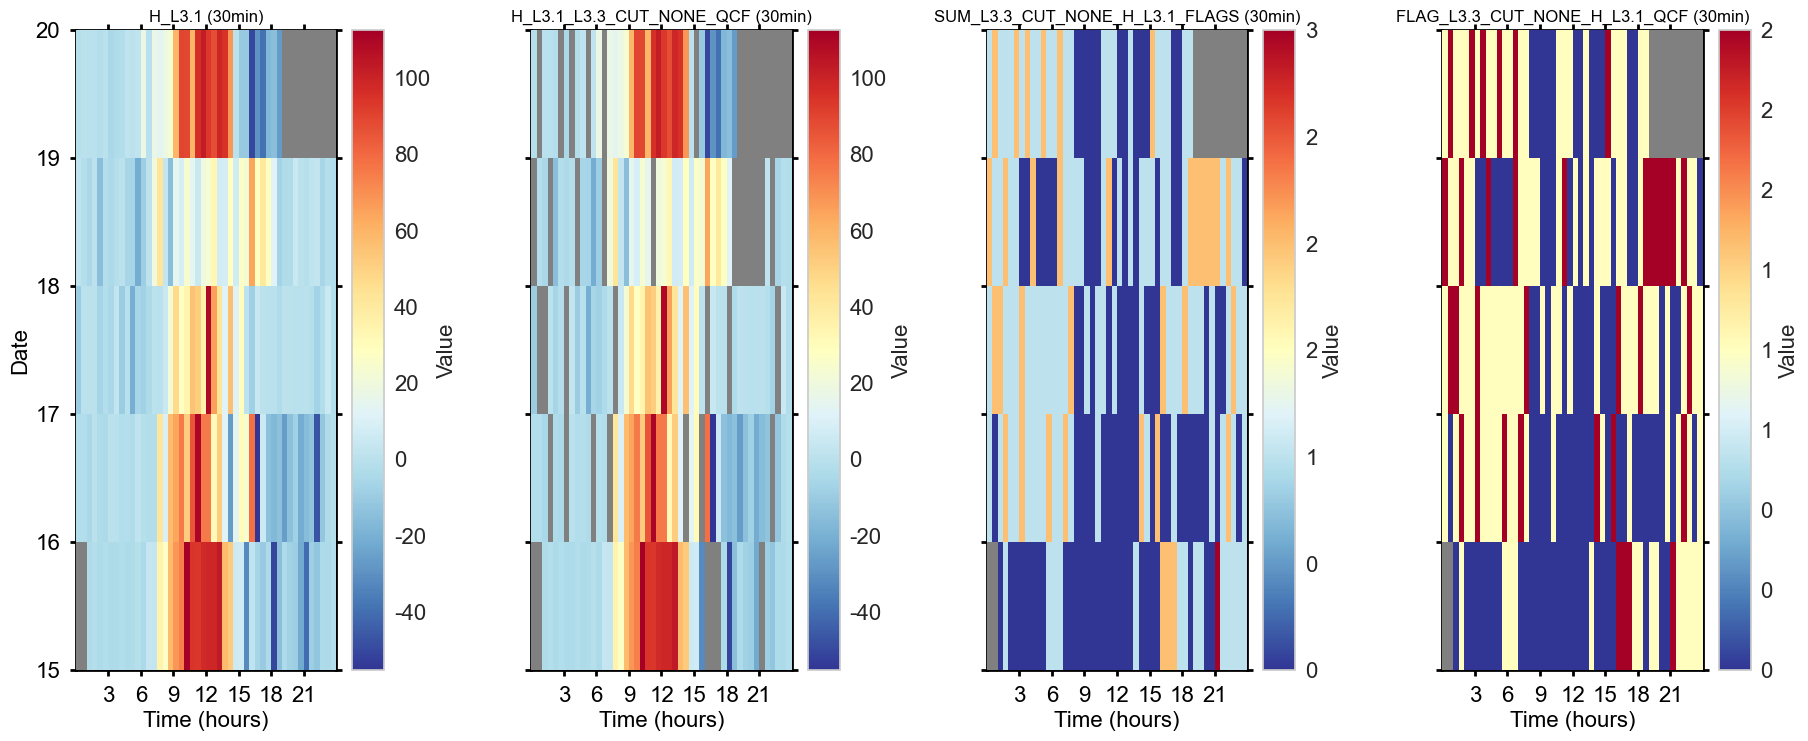

In [3]:
qfpc = QuickFluxProcessingChain(
    fluxvars=FLUXVARS,
    sourcedirs=SOURCEDIRS,
    site_lat=SITE_LAT,
    site_lon=SITE_LON,
    utc_offset=UTC_OFFSET,
    nighttime_threshold=NIGHTTIME_THRESHOLD,
    daytime_accept_qcf_below=DAYTIME_ACCEPT_QCF_BELOW,
    nighttimetime_accept_qcf_below=NIGHTTIMETIME_ACCEPT_QCF_BELOW,
    test_signal_strength=True,
    test_signal_strength_col='CUSTOM_AGC_MEAN',
    test_signal_strength_method='discard above',
    test_signal_strength_threshold=90
)

</br>

In [4]:
quickresults_df =  qfpc.fpc.fpc_df
quickresults_df.head()

,H,USTAR,SW_IN_POT,DAYTIME,NIGHTTIME,FLAG_L2_H_MISSING_TEST,...,SUM_L3.3_CUT_NONE_H_L3.1_HARDFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_SOFTFLAGS,SUM_L3.3_CUT_NONE_H_L3.1_FLAGS,FLAG_L3.3_CUT_NONE_H_L3.1_QCF,H_L3.1_L3.3_CUT_NONE_QCF,H_L3.1_L3.3_CUT_NONE_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2024-08-15 01:15:00,-2.83356,0.037061,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-3.262736,-3.262736
2024-08-15 01:45:00,-2.05814,0.019153,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,-2.182116,NaN
2024-08-15 02:15:00,-2.69514,0.034556,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-3.525409,-3.525409
2024-08-15 02:45:00,-1.87833,0.028195,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-2.307506,-2.307506
2024-08-15 03:15:00,-3.69295,0.036870,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-3.889027,-3.889027


</br>

# **End of notebook**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [5]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2025-03-20 00:39:41
